In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pickle
from ydata_profiling import ProfileReport
from sklearn.linear_model import LinearRegression
import seaborn as sns


In [2]:
dataset = pd.read_csv("Salary_Data.csv")
dataset.describe()

,YearsExperience,Salary
count,30.000000,30.000000
mean,5.313333,76003.000000
std,2.837888,27414.429785
min,1.100000,37731.000000
25%,3.200000,56720.750000
50%,4.700000,65237.000000
75%,7.700000,100544.750000
max,10.500000,122391.000000


In [3]:
dataset.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


In [4]:

dataset.shape

(30, 2)

In [5]:
# Selection of independent and dependent features
X = dataset.iloc[:,:-1].values ## independent feature "year of experience"
Y = dataset.iloc[:,1].values ##dependent feature "Salary"
X


array([[ 1.1],
       [ 1.3],
       [ 1.5],
       [ 2. ],
       [ 2.2],
       [ 2.9],
       [ 3. ],
       [ 3.2],
       [ 3.2],
       [ 3.7],
       [ 3.9],
       [ 4. ],
       [ 4. ],
       [ 4.1],
       [ 4.5],
       [ 4.9],
       [ 5.1],
       [ 5.3],
       [ 5.9],
       [ 6. ],
       [ 6.8],
       [ 7.1],
       [ 7.9],
       [ 8.2],
       [ 8.7],
       [ 9. ],
       [ 9.5],
       [ 9.6],
       [10.3],
       [10.5]])

In [6]:
Y

array([ 39343.,  46205.,  37731.,  43525.,  39891.,  56642.,  60150.,
        54445.,  64445.,  57189.,  63218.,  55794.,  56957.,  57081.,
        61111.,  67938.,  66029.,  83088.,  81363.,  93940.,  91738.,
        98273., 101302., 113812., 109431., 105582., 116969., 112635.,
       122391., 121872.])

In [7]:
## Splitting the dataset in to Train Test
from sklearn.model_selection import train_test_split   ## to fit the train test model on dataset
X_Train, X_Test, Y_Train, Y_Test = train_test_split(X,Y,test_size= 0.3,random_state=2)
print(X_Train.shape)
print(X_Test.shape)
print(Y_Train.shape)
print(Y_Test.shape)


(21, 1)
(9, 1)
(21,)
(9,)


In [8]:
Y_Test

array([ 46205.,  39343.,  61111.,  57189.,  98273.,  93940., 113812.,
        60150.,  43525.])

In [9]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_Train,Y_Train)  ###  Train Model created

LinearRegression()

In [10]:
## Predict the test set
Y_Predict = regressor.predict(X_Test)

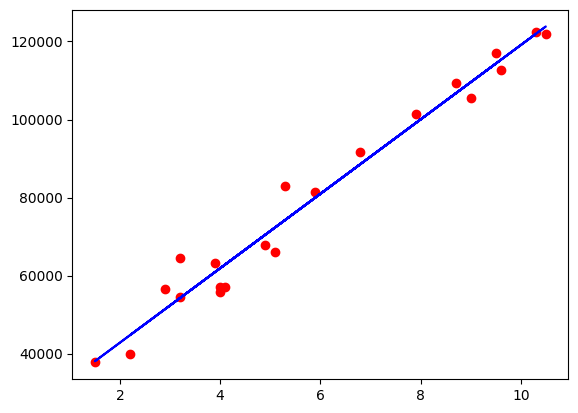

In [11]:
#visualize the training set
plt.scatter(X_Train,Y_Train, color='red')
plt.plot(X_Train, regressor.predict(X_Train),color='blue')

In [12]:
X_Train_Predict = regressor.predict(X_Train)  ## Calculate the Y predict  values on X Train value which plotted on above blue line 
X_Train_Predict

array([ 88574.21720865,  51396.1586181 , 115266.15670955,  61882.27770774,
        44723.17374288,  60928.99415414,  72368.39679738, 121939.14158477,
       109546.45538793,  74274.96390459,  38050.18886765,  54256.00927891,
       114312.87315594, 106686.60472711,  79994.66522621,  61882.27770774,
        99060.33629829, 123845.70869198,  62835.56126135,  70461.82969018,
        54256.00927891])

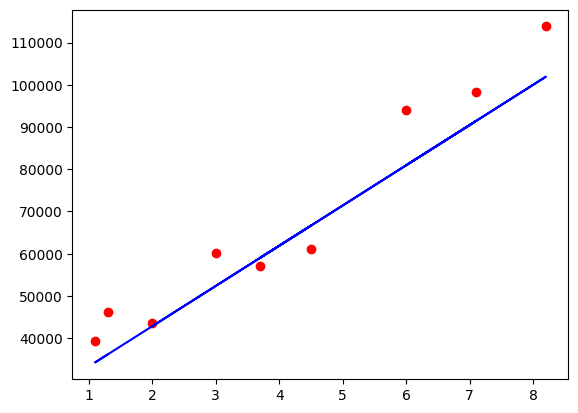

In [13]:
#visualize the test set
plt.scatter(X_Test,Y_Test, color='red')
plt.plot(X_Test, regressor.predict(X_Test),color='blue')

In [14]:
regressor.predict(X_Test)

array([ 36143.62176044,  34237.05465324,  66648.69547576,  59022.42704693,
        91434.06786946,  80947.94877982, 101920.1869591 ,  52349.44217171,
        42816.60663567])

In [15]:
print(regressor.coef_)
print(regressor.intercept_)

[9532.83553604]
23750.93556359499


In [16]:
regressor.score(X_Train,Y_Train)

0.9712477036717582

In [17]:
## Cross validation  important - This will provide the accuracies on different test train sets . their is no such % mention, function automatically caluculate the train test set %
from sklearn.model_selection import cross_val_score
mse = cross_val_score(regressor,X,Y,scoring="neg_mean_squared_error", cv=5)
mse


array([-25905138.76967999, -30974669.99857574, -59780662.11837491,
       -68417038.21806611, -35766738.23965806])

In [18]:
## now caclulate the average on five values of mse
np.mean(mse)

-44168849.46887096

### Ridge Linear Regression

In [19]:
from sklearn.linear_model import Ridge # model
from sklearn.model_selection import GridSearchCV  ## Hypertuning
ridge = Ridge()
ridge

Ridge()

In [20]:
parameters = {'alpha':[1e-15,1e-10,1e-8,1e-2,2,1,5,10,20,30,40,50,100,150]}
ridge_regressor =GridSearchCV(ridge,parameters,scoring='neg_mean_squared_error', cv= 5,verbose=1)
print(ridge_regressor.fit(X,Y))
print(ridge_regressor.best_params_)  ## this is lambda/ alpha value as per ridge formula
print(ridge_regressor.best_score_)


Fitting 5 folds for each of 14 candidates, totalling 70 fits
GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [1e-15, 1e-10, 1e-08, 0.01, 2, 1, 5, 10, 20,
                                   30, 40, 50, 100, 150]},
             scoring='neg_mean_squared_error', verbose=1)
{'alpha': 5}
-40653827.66045602


##LASSO Linear Regression

In [21]:
from sklearn.linear_model import Lasso # model
from sklearn.model_selection import GridSearchCV  ## Hypertuning
lasso = Lasso()
lasso

Lasso()

In [22]:
parameters = {'alpha':[1e-15,1e-10,1e-8,1e-2,2,1,5,10,20,30,40,50,100,150]}
lasso_regressor =GridSearchCV(lasso,parameters,scoring='neg_mean_squared_error', cv= 5,verbose=1) ## cross validation
print(lasso_regressor.fit(X,Y))
print(lasso_regressor.best_params_)  ## this is lambda/ alpha value as per ridge formula
print(lasso_regressor.best_score_)

### As only one feature exist in the data set then Lasso is not good choice to use as lasso is using for feature selection.

Fitting 5 folds for each of 14 candidates, totalling 70 fits
GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [1e-15, 1e-10, 1e-08, 0.01, 2, 1, 5, 10, 20,
                                   30, 40, 50, 100, 150]},
             scoring='neg_mean_squared_error', verbose=1)
{'alpha': 150}
-43766235.03260207


c:\Users\parde\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.968e+08, tolerance: 1.382e+06
  model = cd_fast.enet_coordinate_descent(
c:\Users\parde\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.768e+08, tolerance: 1.960e+06
  model = cd_fast.enet_coordinate_descent(
c:\Users\parde\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the sca

In [23]:
##Elastic Regression

from sklearn.linear_model import ElasticNet # model
from sklearn.model_selection import GridSearchCV  ## Hypertuning
elasticNet = ElasticNet()
elasticNet

ElasticNet()

In [24]:
parameters = {'alpha':[1e-15,1e-10,1e-8,1e-2,2,1,5,10,20,30,40,50,100,150]}
elasticNet_regressor =GridSearchCV(elasticNet,parameters,scoring='neg_mean_squared_error', cv= 5,verbose=1)
print(elasticNet_regressor.fit(X,Y))
print(elasticNet_regressor.best_params_)  ## this is lambda/ alpha value as per eleastic formula
print(elasticNet_regressor.best_score_)

Fitting 5 folds for each of 14 candidates, totalling 70 fits
GridSearchCV(cv=5, estimator=ElasticNet(),
             param_grid={'alpha': [1e-15, 1e-10, 1e-08, 0.01, 2, 1, 5, 10, 20,
                                   30, 40, 50, 100, 150]},
             scoring='neg_mean_squared_error', verbose=1)
{'alpha': 1}
-42212809.014935315


c:\Users\parde\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.967e+08, tolerance: 1.382e+06
  model = cd_fast.enet_coordinate_descent(
c:\Users\parde\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.768e+08, tolerance: 1.960e+06
  model = cd_fast.enet_coordinate_descent(
c:\Users\parde\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the sca

###Prediction


In [25]:
# As per dataset (only 2 features available) ridge liner regression is best fit for the dataset
ridge_regressor_predict = ridge_regressor.predict(X_Test)
lasso_regressor_predict = lasso_regressor.predict(X_Test)
elasticNet_regressor_predict = elasticNet_regressor.predict(X_Test)


C:\Users\parde\AppData\Local\Temp\ipykernel_12224\759170289.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(Y_Test - lasso_regressor_predict, kde=True)


<Axes: ylabel='Density'>

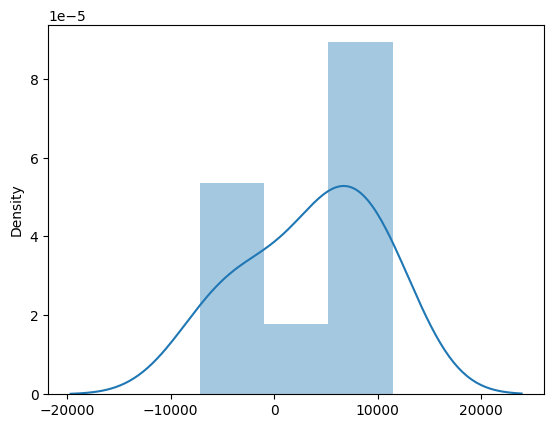

In [26]:
sns.distplot(Y_Test - lasso_regressor_predict, kde=True)

C:\Users\parde\AppData\Local\Temp\ipykernel_12224\901980718.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(Y_Test - ridge_regressor_predict, kde=True)


<Axes: ylabel='Density'>

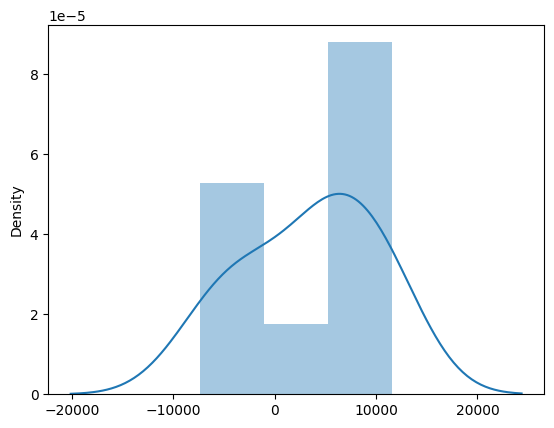

In [27]:
sns.distplot(Y_Test - ridge_regressor_predict, kde=True)

C:\Users\parde\AppData\Local\Temp\ipykernel_12224\2137008068.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(elasticNet_regressor_predict, kde=True)


<Axes: ylabel='Density'>

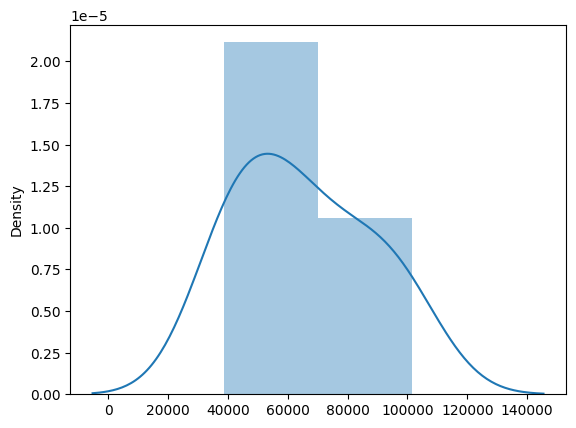

In [28]:
sns.distplot(elasticNet_regressor_predict, kde=True)

In [29]:
## Calculate the accuracy using R square 
from sklearn.metrics import r2_score
print(r2_score(Y_Test,ridge_regressor_predict))
print(r2_score(Y_Test,lasso_regressor_predict))
print(r2_score(Y_Test,elasticNet_regressor_predict))

0.922007643145913
0.9226640470515605
0.9183293639526843


### Adjusted R square value

In [30]:
## Adjusted R2 
adjusted_rquare = 1-(((1-(r2_score(Y_Test,ridge_regressor_predict))) *(30-1))/28)
adjusted_rquare

0.9192222018296956

In [31]:
adjusted_rquare = 1-(((1-(r2_score(Y_Test,lasso_regressor_predict))) *(30-1))/28)
adjusted_rquare

0.9199020487319733

In [32]:
adjusted_rquare = 1-(((1-(r2_score(Y_Test,elasticNet_regressor_predict))) *(30-1))/28)
adjusted_rquare

0.915412555522423

In [33]:
### To check R2 normal linear Regressiona and R2 of ridge
## Calculate the cross validation on normal linear regression and R2
